    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
Media de edad: 37.655
Mediana de edad: 37.0
Moda de edad: 0    35
Name: Age, dtype: int64
Sesgo de edad: 0.23133746309642822
Curtosis

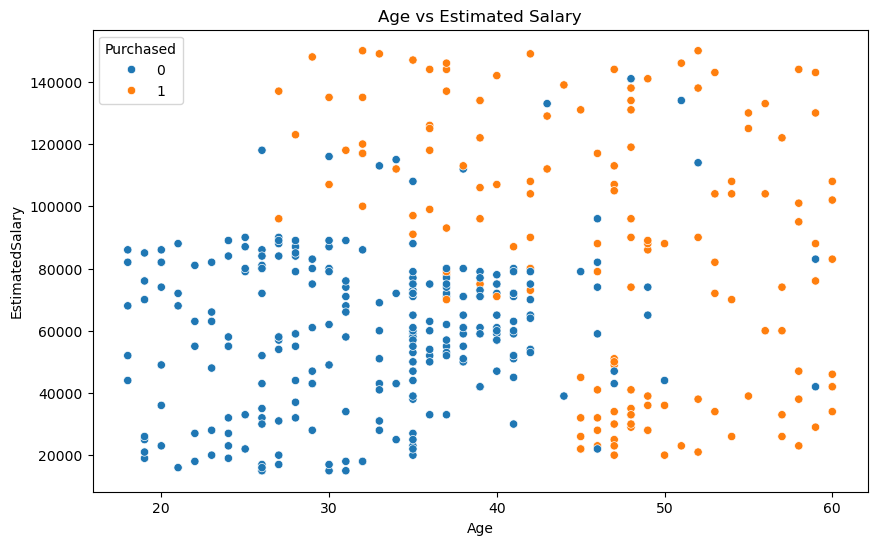

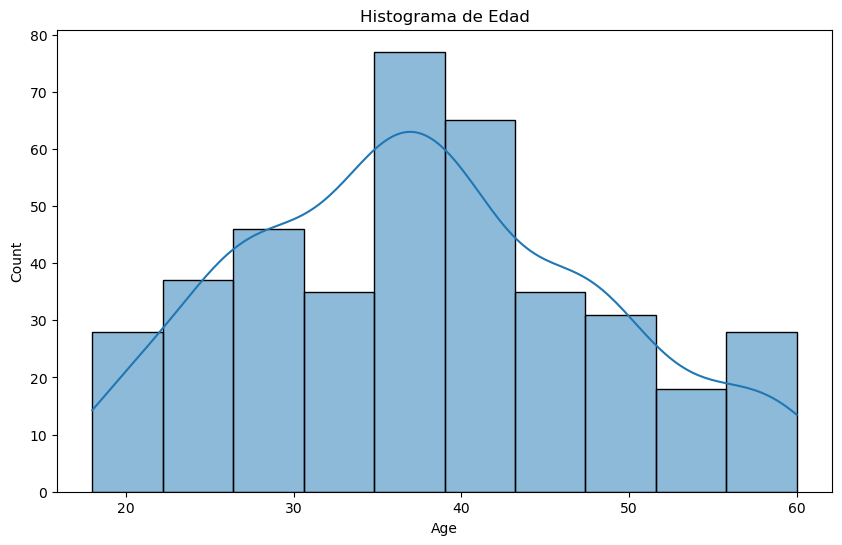

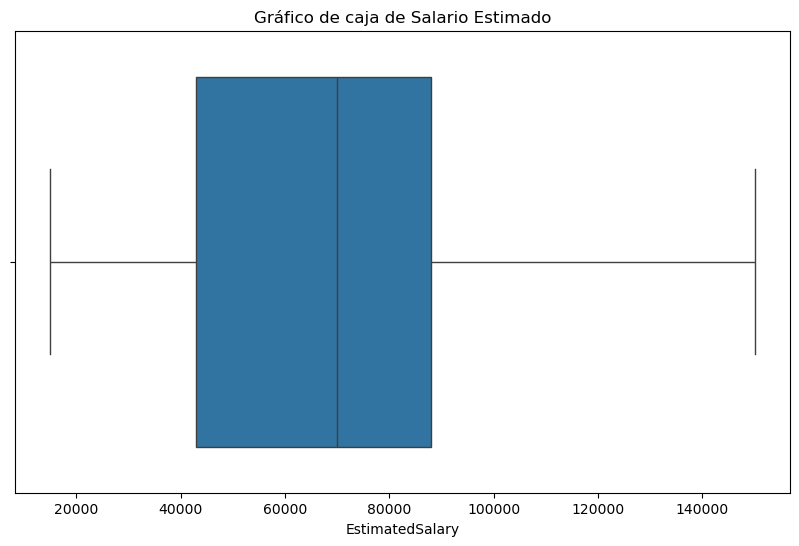

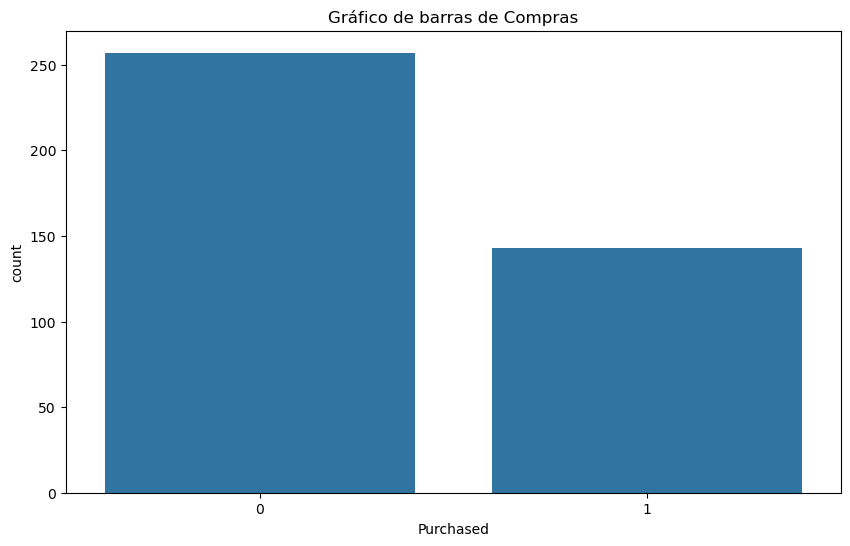

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_csv('Social_Network_Ads.csv')

# Ver las primeras filas del DataFrame
print(data.head())

# Análisis univariable
print(data.describe())

# Análisis de tendencia central
mean_age = data['Age'].mean()
median_age = data['Age'].median()
mode_age = data['Age'].mode()

print(f'Media de edad: {mean_age}')
print(f'Mediana de edad: {median_age}')
print(f'Moda de edad: {mode_age}')

# Sesgo
age_skew = data['Age'].skew()
print(f'Sesgo de edad: {age_skew}')

# Curtosis
age_kurtosis = data['Age'].kurtosis()
print(f'Curtosis de edad: {age_kurtosis}')

# Análisis multivariable
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data)
plt.title('Age vs Estimated Salary')
plt.show()

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Histograma de Edad')
plt.show()

# Gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='EstimatedSalary', data=data)
plt.title('Gráfico de caja de Salario Estimado')
plt.show()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Purchased', data=data)
plt.title('Gráfico de barras de Compras')
plt.show()


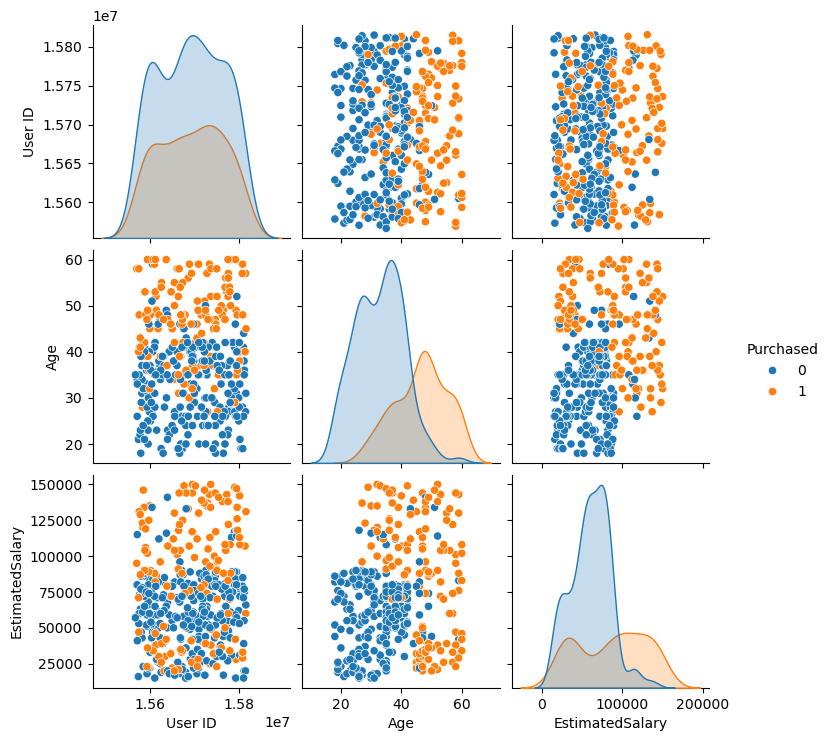

In [50]:
sns.pairplot(data, hue='Purchased')
plt.show()

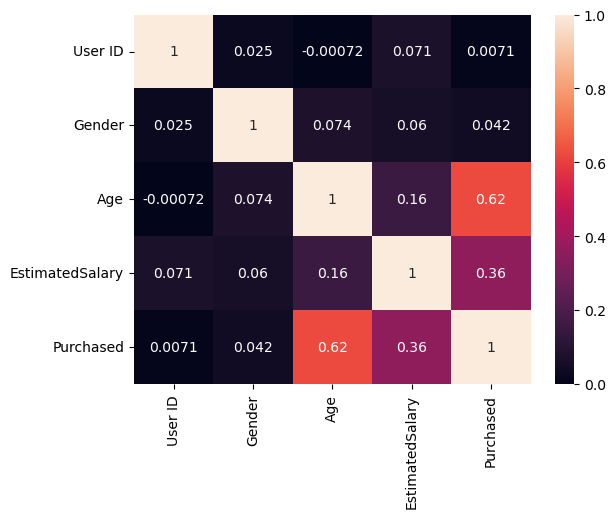

In [56]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Codificar la variable 'Gender'
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Normalizar las variables 'Age' y 'EstimatedSalary'
scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


In [53]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))


Accuracy: 0.8875
Recall: 0.75
F1 Score: 0.8235294117647057
AUC: 0.8557692307692307


In [54]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Imprimir las predicciones
print(y_pred)


[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]


Esto imprimirá un array con las predicciones del modelo para cada observación en el conjunto de prueba X_test.

In [55]:
# Supongamos que tienes una nueva observación con los siguientes valores:
new_observation = pd.DataFrame({
    'Gender': ['Male'],  # Recuerda que 'Male' se codificó como 0 y 'Female' como 1
    'Age': [30],
    'EstimatedSalary': [50000]
})

# Necesitas preprocesar la nueva observación de la misma manera que preprocesaste los datos de entrenamiento
new_observation['Gender'] = new_observation['Gender'].map({'Male': 0, 'Female': 1})
new_observation[['Age', 'EstimatedSalary']] = scaler.transform(new_observation[['Age', 'EstimatedSalary']])

# Ahora puedes hacer una predicción para la nueva observación
new_prediction = model.predict(new_observation)

print(new_prediction)


[0]


Esto imprimirá la predicción del modelo para la nueva observación. Recuerda que en este caso, una predicción de 0 significa que el modelo predice que el usuario no comprará el producto, y una predicción de 1 significa que el modelo predice que el usuario comprará el producto.

Eso significa que el modelo predice que el usuario con las características proporcionadas (un hombre de 30 años con un salario estimado de 50000) no comprará el producto, según el modelo de regresión logística que has entrenado. Recuerda que esto es solo una predicción basada en los datos de entrenamiento y las características del usuario. La predicción real puede variar en función de otros factores no considerados en el modelo.